# Titanic - Machine Learning from Disaster

An attempt to predict survival inspired by the Kaggle challenge with the Titanic dataset. The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. Testetstest

<a href='#EDA'>1. EDA</a><br>
<a href>Age</a><br>
<a href='#RFT'>2. Random Forest</a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("https://www.dropbox.com/s/1xyc3klpx2mtrqf/train.csv?dl=1")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<a id='EDA'></a>
## EDA 

Learn about the data!

For each variable:
<li> Is it categorical?
<li> What are the categories?
<li> Is it numerical?
<li> What is the min, max, mean, median?
<li> What is the distribution?
<li> Are there any missing values?

In [4]:
df.shape

(891, 12)

In [5]:
# view the number of survivors
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
survival_rate = round(float(342/891)*100,2)
print(survival_rate)

38.38


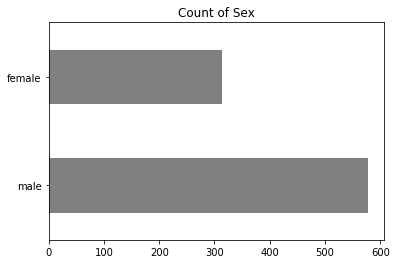

In [7]:
# plot the number of males vs females
df['Sex'].value_counts().plot(kind="barh", color="Gray", title="Count of Sex");

In [8]:
# select all females
females = tnt[tnt['Sex']=='female']

NameError: name 'tnt' is not defined

In [ ]:
# descriptive statistics
df.describe()

In [ ]:
# distribution of fare price = majority between 0-100 with a mean of 32
plt.hist(df['Fare'], bins=5)
plt.show()

In [ ]:
# distribution of age = mean is 29
df['Age'].hist();

In [ ]:
# survivorship = males have much lower survivorship 
fig, axs = plt.subplots(1,2)
df[df['Sex']=='male'].Survived.value_counts().plot(kind='barh', color=['IndianRed','SkyBlue'], ax=axs[0], title='Male Survivorship');
df[df['Sex']=='female'].Survived.value_counts().plot(kind='barh', color=['SkyBlue','IndianRed'], ax=axs[1], title='Female Survivorship');

In [ ]:
# male vs female child survivorship
fig, axs = plt.subplots(1,2)
df[(df.Age < 15) & (df.Sex == 'male')].Survived.value_counts().plot(kind='barh', color=['SkyBlue','IndianRed'], ax=axs[0], title='Male Child Survivorship');
df[(df.Age < 15) & (df.Sex == 'female')].Survived.value_counts().plot(kind='barh', color=['SkyBlue','IndianRed'], ax=axs[1], title='Female Child Survivorship');

## Missing Data

In [9]:
# find missing data, age and cabin contain missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the 177 missing ages - this is a significant amount of missing values.

Strategies:
<li> Remove the rows with missing ages - but would lose a chunk of the data
<li> Set NaN to either 0 or a new category
<li> Replace NaN with the average/mean value
<li> Create a machine learning algorithm to find the missing values (best option but complex)
    <li> Take other variables pclass, sex, fare, ticket, embarked to predict age 

In [ ]:
# replace missing ages with the mean age
avgAge = df['Age'].mean()
df_1 = df['Age'].fillna(value=avgAge)

<a id='RFT'></a>
### Random Forests

Benefits

<li> Automatically model non-linear relations and interactions between variables.
<li> Easy to tune.
<li> Relatively easy to understand everything about them.
<li> Useful for EDA and high dimensional data.
<li> In general, beats most models at most prediction tasks.